In [33]:
import time

import pandas as pd
import tensorflow as tf

from window import WindowGenerator
import utils

# Dataset

In [34]:
case_1 = pd.read_csv("../datasets/case_1.csv", index_col='Time')
case_2 = pd.read_csv("../datasets/case_2.csv", index_col='Time')
case_3 = pd.read_csv("../datasets/case_3.csv", index_col='Time')
case_4 = pd.read_csv("../datasets/case_4.csv", index_col='Time')
case_5 = pd.read_csv("../datasets/case_5.csv", index_col='Time')

In [35]:
outlets = [ col for col in case_1.columns.values if col.startswith('outlet') ]
label_columns = outlets[1:]
num_features = case_1.shape[1]

In [36]:
column_indices = { name: i for i, name in enumerate(case_1.columns) }

# Model Creation

In [37]:
IN_WIDTH = 18
OUT_STEPS = 18
MAX_EPOCHS = 15
BATCH_SIZE = 32
features_size = len(label_columns)

In [38]:
print(f"Using {IN_WIDTH*5}s of data to predict {OUT_STEPS*5}s.")
print(f"Using {IN_WIDTH*5//60}min {IN_WIDTH*5 % 60}s of data to predict {OUT_STEPS*5//60}min {IN_WIDTH*5 % 60}s into de future.")

Using 90s of data to predict 90s.
Using 1min 30s of data to predict 1min 30s into de future.


In [39]:
CONV_WIDTH = 3 # default 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*features_size,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, features_size])
])

multi_conv_model.compile(loss=tf.losses.MeanSquaredError(),
                         optimizer=tf.optimizers.Adam(),
                         metrics=[tf.metrics.RootMeanSquaredError()])

# history = compile_and_fit(multi_conv_model, multi_window)

# IPython.display.clear_output()

# multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
# multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
# multi_window.plot(multi_conv_model)

In [40]:
exec_times = {}

In [41]:
results = {}

## Case 2

In [42]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_2,
    model=multi_conv_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS,
    batch_size=BATCH_SIZE
)
exec_times['case_2'] = time.time() - start_t

2022-10-11 07:41:46.043255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-11 07:41:46.805243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [43]:
exec_times

{'case_2': 6.8817949295043945}

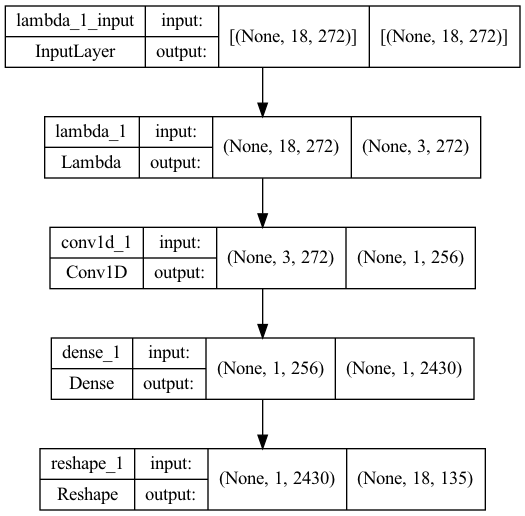

In [44]:
tf.keras.utils.plot_model(multi_conv_model, "../plots/models/multi_conv_model.png", show_shapes=True)

label_col_index 134
label_col_index 134


2022-10-11 07:41:52.893836: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


label_col_index 134


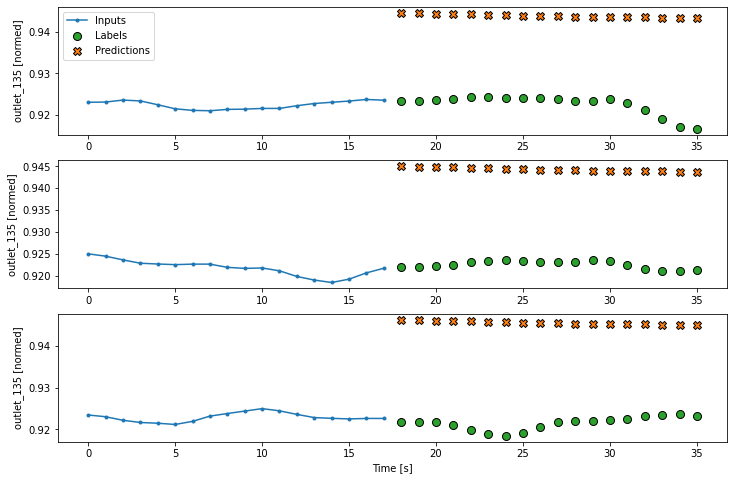

In [45]:
window.plot(multi_conv_model, plot_col="outlet_135")

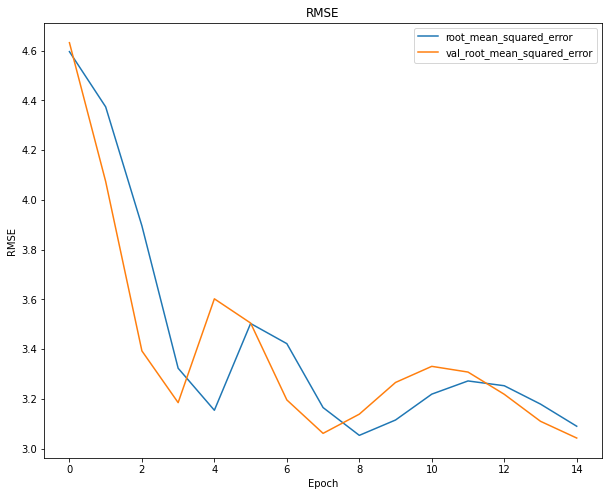

In [46]:
utils.plot_losses(history=history)

In [47]:
results['case_2'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 3

In [48]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_3,
    model=multi_conv_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS,
    batch_size=BATCH_SIZE
)

exec_times['case_3'] = time.time() - start_t

label_col_index 134
label_col_index 134
label_col_index 134


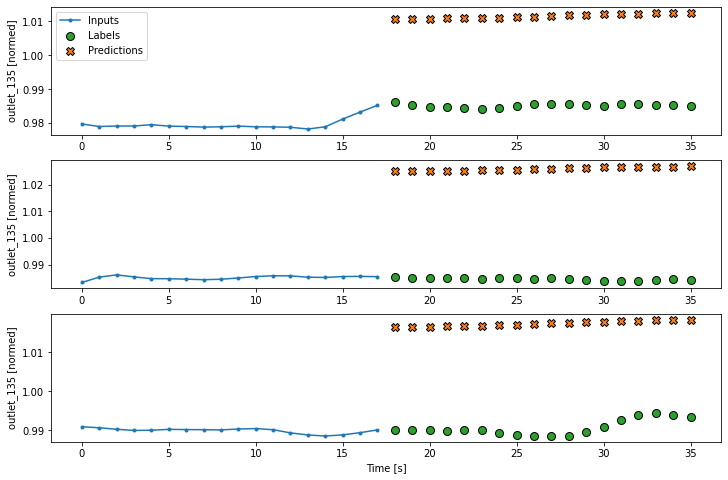

In [49]:
window.plot(multi_conv_model, plot_col="outlet_135")

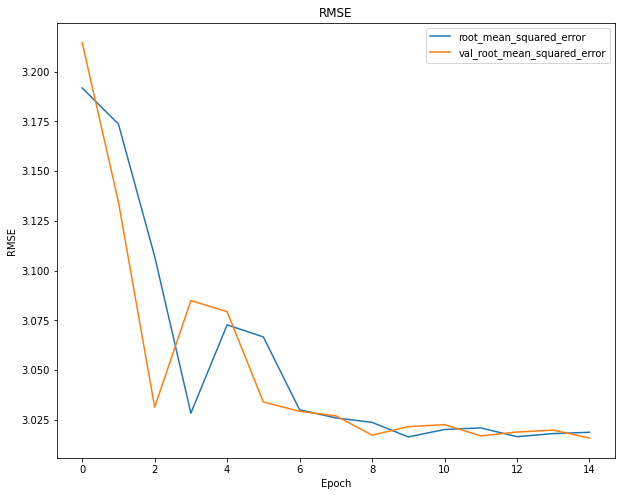

In [50]:
utils.plot_losses(history=history)

In [51]:
results['case_3'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 4

In [52]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_4,
    model=multi_conv_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS,
    batch_size=BATCH_SIZE
)

exec_times['case_4'] = time.time() - start_t

label_col_index 134
label_col_index 134
label_col_index 134


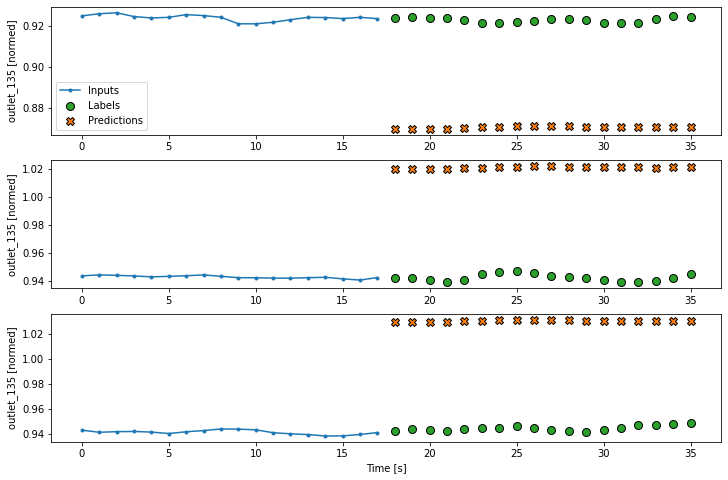

In [53]:
window.plot(multi_conv_model, plot_col="outlet_135")

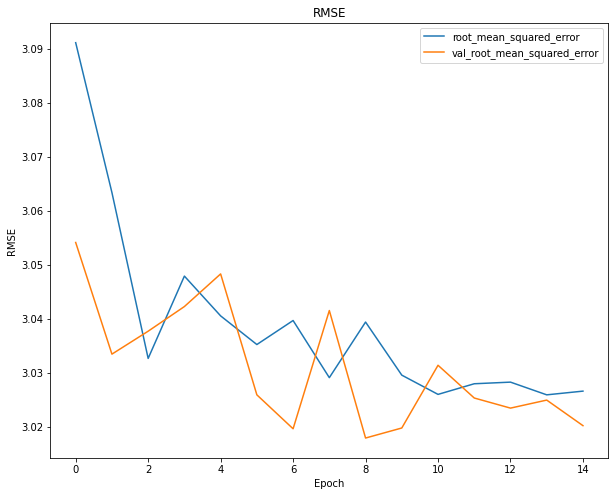

In [54]:
utils.plot_losses(history=history)

In [55]:
results['case_4'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 5

In [56]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_5,
    model=multi_conv_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS,
    batch_size=BATCH_SIZE
)

exec_times['case_5'] = time.time() - start_t

label_col_index 134
label_col_index 134
label_col_index 134


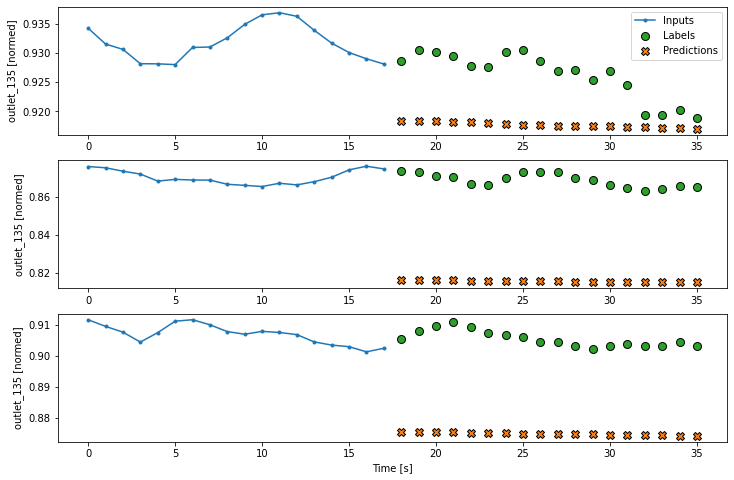

In [57]:
window.plot(multi_conv_model, plot_col="outlet_135")

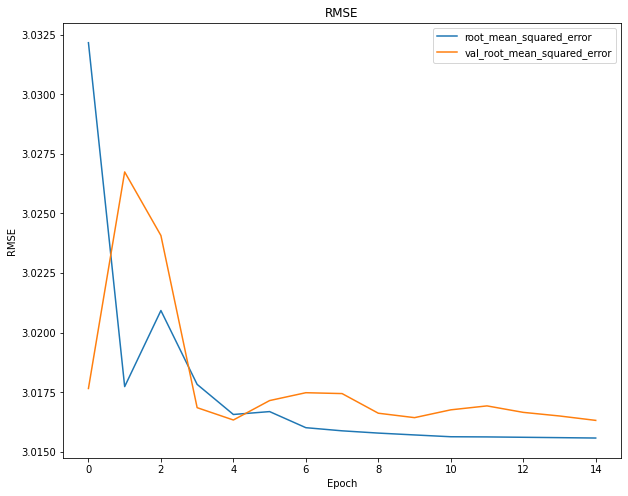

In [58]:
utils.plot_losses(history=history)

In [59]:
results['case_5'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 1 (Testing)

In [60]:
window = WindowGenerator(
    train_df=case_1,
    input_width=IN_WIDTH,
    label_width=OUT_STEPS,
    shift=OUT_STEPS,
    label_columns=label_columns
)

test_res = multi_conv_model.evaluate(window.train) # testing

5/5 [==============================] - 0s 8ms/step - loss: 0.0254 - root_mean_squared_error: 0.1764


In [61]:
results['test'] = {
    'loss': utils.inverse_transform_loss(test_res[0]),
    'rmse': utils.inverse_transform_rmse(test_res[1])
}

In [62]:
pd.DataFrame(results).transpose().round(4)

,loss,rmse,val_loss,val_rmse
case_2,9.5481,3.0900,9.2248,3.0426
case_3,9.1127,3.0188,9.0929,3.0159
case_4,9.1602,3.0266,9.1217,3.0202
case_5,9.0937,3.0156,9.0982,3.0163
test,9.6918,3.1349,NaN,NaN


In [63]:
exec_times_df = pd.DataFrame().from_dict(exec_times, orient='index', columns=['Time'])
exec_times_df.round(2)

,Time
case_2,6.88
case_3,6.21
case_4,6.72
case_5,6.93


In [64]:
print("Total training time: %.2fs" % exec_times_df['Time'].sum())

Total training time: 26.74s
